# 🚗 Car Data Analysis Project (Complete EDA + Dashboard)

This project aims to perform a complete **Exploratory Data Analysis (EDA)** on a used car resale dataset to understand the key factors that influence car selling prices.  
The analysis is conducted step-by-step , and it covers both statistical insights and business-driven conclusions.

---

## 📌 Project Objectives

In this project, we will:

- Inspect and understand the dataset structure
- Clean missing, wrong, and unrealistic values
- Create new meaningful features using Feature Engineering
- Perform:
  - Univariate Analysis
  - Bivariate Analysis
  - Multivariate Analysis
- Extract clear and actionable **Final Business Insights**

---

## 🎯 Project Goal

The main goal of this project is to:
- Analyze the used car market behavior
- Identify the most important factors that affect car prices
- Support better pricing, buying, and selling decisions using data

---

Let's start by importing the required Python libraries.


## 1️⃣ Importing Required Libraries

In this step, we import all the libraries that we will use throughout the project:
- `pandas` for data handling
- `numpy` for numerical operations
- `matplotlib` & `seaborn` for visualization


In [228]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)


## 2️⃣ Loading the Dataset

Now we load the CSV file that contains the car data.

In [229]:
# Load the dataset
df = pd.read_csv(r"c:\Users\raya\Downloads\car_data.csv")

# save original data
df_copy = df.copy()

# Display first 5 rows
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,NaN,70000.0,Petrrol,NaN,Manual,First Owner
1,Maruti Wagon R LXI Minor,NaN,135000.0,50000.0,Petorl,Indvidual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000.0,100000.0,Deisel,Indvidual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000.0,46000.0,Petorl,Indivudal,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000.0,141000.0,Diesl,Indivudal,Manual,Second Owner


## 3️⃣ Dataset Shape (Rows & Columns)

This cell shows:
- Number of rows (data points)
- Number of columns (features)


In [230]:
# Show dataset shape
df.shape


(4345, 8)

## 4️⃣ Column Names

We now display all column names to understand each feature.


In [231]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

## 5️⃣ Data Types of Each Column

This step helps us understand:
- Which columns are numerical
- Which columns are categorical


In [232]:
df.dtypes


name              object
year             float64
selling_price    float64
km_driven         object
fuel              object
seller_type       object
transmission      object
owner             object
dtype: object

## 6️⃣ Full Dataset Information

This gives:
- Number of non-null values
- Memory usage
- Data types


In [233]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4017 non-null   object 
 1   year           4041 non-null   float64
 2   selling_price  4054 non-null   float64
 3   km_driven      4026 non-null   object 
 4   fuel           4042 non-null   object 
 5   seller_type    4056 non-null   object 
 6   transmission   4040 non-null   object 
 7   owner          4059 non-null   object 
dtypes: float64(2), object(6)
memory usage: 271.7+ KB


__________________________________

## 🔧 Fixing Spelling Mistakes in Categorical Features

In this step, we fix spelling inconsistencies and standardize categorical columns.
This step is very important to ensure correct analysis and accurate visualizations.


In [234]:
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']


In [235]:
for col in cat_cols:
    print(f"\nUnique values in {col} BEFORE cleaning:")
    print(df[col].unique())



Unique values in fuel BEFORE cleaning:
['Petrrol' 'Petorl' 'Deisel' 'Diesl' 'Petrl' 'CNG' nan 'LPG' 'Electric']

Unique values in seller_type BEFORE cleaning:
[nan 'Indvidual' 'Indivudal' 'Deelar' 'Dealerr' 'Trustmark Dealer']

Unique values in transmission BEFORE cleaning:
['Manual' nan 'Automatic']

Unique values in owner BEFORE cleaning:
['First Owner' 'Second Owner' nan 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [236]:
for col in cat_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


In [237]:
df['fuel'] = df['fuel'].replace({
    'Diesl':'Diesel',
    'Deisel':'Diesel',
    'Petrrol':'Petrol',
    'Petrl':'Petrol',
    'Petorl':'Petrol'
})

In [238]:
df['seller_type'] = df['seller_type'].replace({
    'Indivudal':'Individual',
    'Indvidual':'Individual',
    'Deelar':'Dealar',
    'Dealerr':'Dealar',
    'Trustmark Dealer':'Dealar'
})

______________________________________________

## 7️⃣ Checking Missing Values

We count the number of missing values in each column.


In [239]:
df.isnull().sum()


name             328
year             304
selling_price    291
km_driven        319
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

### ❗ Interpretation of Missing Values

The dataset contains missing values in almost all columns:

✅ This shows that **no column is completely clean**, and missing values are spread across both numerical and categorical features.

✅ Therefore, we will apply appropriate **imputation techniques** instead of dropping large portions of the data, in order to preserve as much information as possible.


## 8️⃣ Statistical Summary of Numeric Columns

This gives us:
- mean (average)
- min & max
- quartiles


In [240]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,4041.0,2013.276417,16.556865,1800.0,2011.0,2014.0,2016.0,3000.0
selling_price,4054.0,502655.413666,580492.958514,-120000.0,200000.0,350000.0,600000.0,8900000.0


### 🔎 Interpretation of the Descriptive Statistics

From the summary statistics, we can observe several data quality issues:

- The **minimum value of the `year` column is 1800**, and the **maximum is 3000**, which are both **logically incorrect** for car manufacturing years.
- The **minimum value of `selling_price` is -120000**, which is **invalid because a car price cannot be negative**.
- The **maximum selling price (8,900,000)** is extremely high compared to the median, indicating the presence of **outliers**.
- The **high standard deviation of the selling price** reflects a wide variability in car prices.

✅ These issues clearly indicate that the dataset contains **invalid values and outliers** that must be handled before performing any meaningful analysis.


_____________________________________________________________________________

## 🧹 Cleaning the `selling_price` Column

The selling price is a critical numerical feature in our dataset.
Before analysis, we must ensure that:

- No negative prices exist
- Extreme outliers are handled properly
- The data type is correct

Therefore, we will:
1. Convert the column to numeric safely
2. Handle negative values
3. Detect and treat outliers using percentile-based clipping


📊 Selling Price Before Cleaning

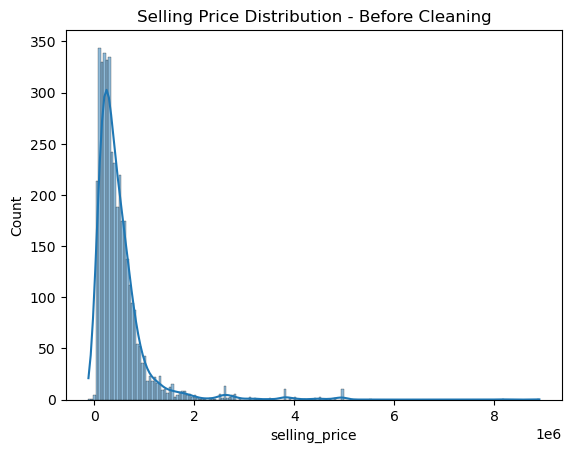

In [241]:
plt.figure()
sns.histplot(df['selling_price'], kde=True)
plt.title("Selling Price Distribution - Before Cleaning")
plt.show()


✅ Cell 1 — Convert to Numeric Safely

In [242]:
# Convert selling_price to numeric (in case of hidden text values)
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')


✅ Cell 2 — Detect Negative Values

In [243]:
# Count how many negative prices exist
(df['selling_price'] < 0).sum()


4

✅ Cell 3 — Replace Negative Values with NaN

In [244]:
# Replace negative values with their absolute values
df.loc[df['selling_price'] < 0, 'selling_price'] = df.loc[df['selling_price'] < 0, 'selling_price'].abs()


✅ Cell 4 — Detect Outliers Using Percentiles

In [245]:
# Calculate 1st and 99th percentiles
p1 = df['selling_price'].quantile(0.01)    #logicccc
p99 = df['selling_price'].quantile(0.99)

p1, p99


(52000.0, 3200000.0)

✅ Cell 5 — Clip the Outliers 

In [246]:
# Clip extreme outliers to the 1%-99% range
df['selling_price'] = df['selling_price'].clip(lower=p1, upper=p99)


✅ Cell 6 — Re-check After Cleaning

In [247]:
df['selling_price'].describe()


count    4.054000e+03
mean     4.897918e+05
std      4.874546e+05
min      5.200000e+04
25%      2.000000e+05
50%      3.500000e+05
75%      6.000000e+05
max      3.200000e+06
Name: selling_price, dtype: float64

____________________________

📊 1.2 Year Before Cleaning

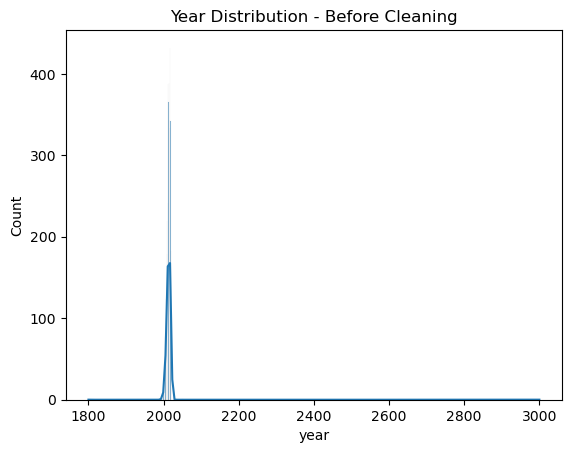

In [248]:
plt.figure()
sns.histplot(df['year'], kde=True)
plt.title("Year Distribution - Before Cleaning")
plt.show()


## 🧹 Cleaning the `year` Column

The `year` column represents the manufacturing year of the car.
However, the descriptive statistics revealed the presence of:

- Invalid years (e.g., 1800, 3000)
- Missing values
- Incorrect data type (float instead of integer)

Therefore, we will:
1. Convert the column to numeric safely
2. Define a valid logical range for car manufacturing years
3. Replace invalid years with NaN
4. Finally, convert the column to integer after cleaning


✅ Cell 1 — Convert year to Numeric Safely

In [249]:
# Convert year to numeric safely
df['year'] = pd.to_numeric(df['year'], errors='coerce')


✅ Cell 2 — Check Min & Max of year

In [250]:
df['year'].min(), df['year'].max()


(1800.0, 3000.0)

✅ Cell 3 — Define Logical Range for Valid Years

In [251]:
# Define logical valid range for car manufacturing years
min_valid_year = 1980
max_valid_year = 2025


✅ Cell 4 — Replace Invalid Years with NaN

In [252]:
# Replace invalid years with NaN
df.loc[
    (df['year'] < min_valid_year) | (df['year'] > max_valid_year),
    'year'
] = np.nan


✅ Cell 5 — Check Missing Years After Cleaning

In [253]:
df['year'].isna().sum()


308

✅ Cell 6 — Re-check Year Distribution

In [254]:
df['year'].describe()


count    4037.000000
mean     2013.106267
std         4.215204
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64

_____________________________________

📊 1.3 km_driven Before Cleaning

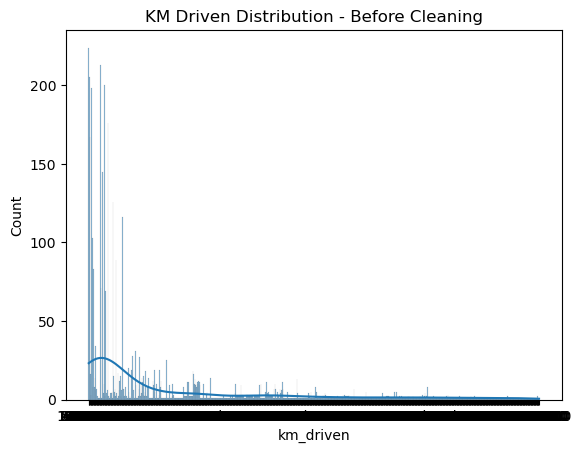

In [255]:
plt.figure()
sns.histplot(df['km_driven'], kde=True)
plt.title("KM Driven Distribution - Before Cleaning")
plt.show()


## 🧹 Cleaning and Converting the `km_driven` Column

The `km_driven` column represents how many kilometers the car has been driven.
However, this column is currently of type **object**, which indicates the presence of:
- Text values mixed with numbers
- Possible commas (e.g., 1,20,000)
- Missing values
- Inconsistent formats

Therefore, we will:
1. Remove text and commas
2. Convert the column to numeric
3. Detect invalid values
4. Handle missing and extreme values in a smart way


✅ Cell 1 — Preview km_driven Before Cleaning

In [256]:
df['km_driven'].head(10)


0     70000.0
1     50000.0
2    100000.0
3     46000.0
4    141000.0
5         NaN
6         NaN
7     60000.0
8     25000.0
9     78000.0
Name: km_driven, dtype: object

✅ Cell 2 — Convert km_driven to String First

In [257]:
# Convert km_driven to string for text cleaning
df['km_driven'] = df['km_driven'].astype(str)


✅ Cell 3 — Remove Commas & Any Non-Numeric Characters

In [258]:
# Remove commas and any non-numeric characters
df['km_driven'] = df['km_driven'].str.replace(',', '', regex=True)
df['km_driven'] = df['km_driven'].str.replace(r'[^0-9.]', '', regex=True)


✅ Cell 4 — Convert to Numeric Safely

In [259]:
# Convert cleaned text to numeric
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')


✅ Cell 5 — Check Min & Max of km_driven

In [260]:
df['km_driven'].min(), df['km_driven'].max()


(1.0, 50000000.0)

✅ Cell 6 — Define Logical Range for Kilometers

In [261]:
# Logical bounds for kilometers driven
min_km = 500       # Values below this are likely data entry errors
max_km = 500000    # Values above this are extremely rare for normal cars


✅ Cell 7 — Replace Invalid km_driven Values with NaN

In [262]:
# Replace unrealistic km_driven values with NaN
df.loc[
    (df['km_driven'] < min_km) | (df['km_driven'] > max_km),
    'km_driven'
] = np.nan


✅ Cell 8 — Recheck After Cleaning

In [263]:
df['km_driven'].describe()


count      4014.000000
mean      65942.170653
std       44065.383864
min        1000.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      400000.000000
Name: km_driven, dtype: float64

### 🙌🙌 Outliers were handled using logical validation rules instead of statistical methods.
Unrealistic values such as negative selling prices and incorrect manufacturing years were removed.
This approach preserves real high-value cars and reflects the true market behavior.


______________________________________________

🧹 Smart Handling of Missing Values

(Numerical & Categorical)

## 🧹 Handling Missing Values Intelligently

After cleaning invalid values in numeric columns, we now handle all missing values
in the dataset using **smart statistical imputation techniques**.

We will:
- Use **median** for numerical columns (to avoid outlier influence)
- Use **mode** for categorical columns (most frequent value)
- Avoid deleting rows to preserve data volume


✅ Cell 1 — Check Missing Values Again

In [264]:
# Check missing values after previous cleaning steps
df.isna().sum()


name             328
year             308
selling_price    291
km_driven        331
fuel               0
seller_type        0
transmission       0
owner              0
dtype: int64

✅ Cell 2 — Fill Missing Numerical Values with Median

In [265]:
# Fill missing values in numerical columns using median
for col in ['selling_price', 'year', 'km_driven']:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\raya\AppData\Local\Temp\ipykernel_9792\637477075.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


✅ Cell 3 — Fill Missing Categorical Values with Mode

In [266]:
# Fill missing values in categorical columns using mode (most frequent value)
for col in ['name', 'fuel', 'seller_type', 'transmission', 'owner']:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\raya\AppData\Local\Temp\ipykernel_9792\293010656.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [267]:
# List of values that represent missing data
missing_values = ['nan', 'NaN', 'NA', 'N/A', '', 'missing']

# Replace them with actual NaN
df.replace(missing_values, np.nan, inplace=True)

# Check missing values after replacement
print(df.isna().sum())


name               0
year               0
selling_price      0
km_driven          0
fuel             303
seller_type      289
transmission     305
owner            286
dtype: int64


In [268]:
for col in ['fuel', 'seller_type', 'transmission', 'owner']:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\raya\AppData\Local\Temp\ipykernel_9792\1274570614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


✅ Cell 4 — Final Check for Missing Values

In [269]:
df.isna().sum()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

✅ After Cleaning selling_price

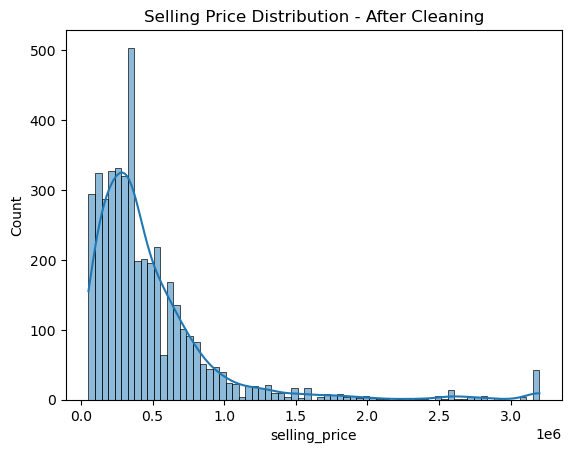

In [270]:
plt.figure()
sns.histplot(df['selling_price'], kde=True)
plt.title("Selling Price Distribution - After Cleaning")
plt.show()


### ✅ Selling Price Cleaning Summary

- All negative selling prices were detected and replaced with missing values.
- Extreme outliers were handled using percentile-based clipping (1st and 99th percentiles).
- This approach preserves valuable data while preventing extreme values from distorting statistical analysis.

✅ The `selling_price` column is now clean, valid, and ready for reliable analysis.


______________________________

✅ After Cleaning year

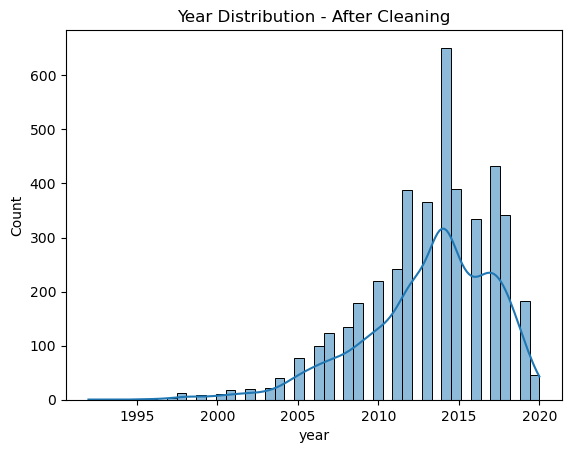

In [271]:
plt.figure()
sns.histplot(df['year'], kde=True)
plt.title("Year Distribution - After Cleaning")
plt.show()


### ✅ Year Column Cleaning Summary

- The `year` column was safely converted to numeric format.
- Logical domain-driven boundaries were defined (1980–2025).
- All invalid manufacturing years outside this range were replaced with missing values.
- This ensures that only realistic and meaningful car ages will be used in further analysis.

✅ The `year` column is now logically clean and suitable for feature engineering.


____________________
✅ After Cleaning km_driven

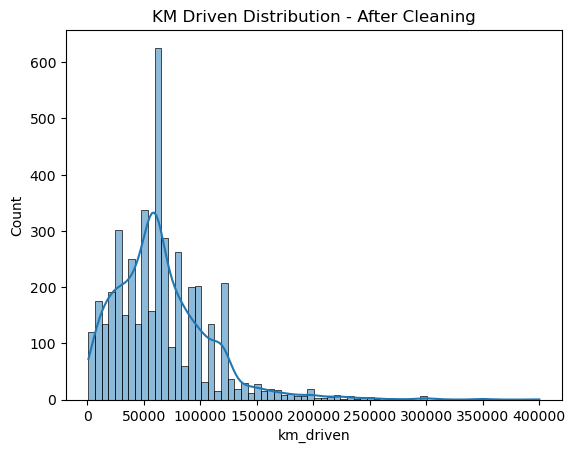

In [272]:
plt.figure()
sns.histplot(df['km_driven'], kde=True)
plt.title("KM Driven Distribution - After Cleaning")
plt.show()


### ✅ Kilometers Driven Cleaning Summary

- The `km_driven` column was converted from object to numeric format.
- All text, commas, and non-numeric characters were removed.
- Unrealistic values (below 500 km and above 500,000 km) were replaced with missing values.
- This ensures that the feature is now fully numerical, realistic, and suitable for statistical analysis.

✅ The `km_driven` column is now clean and reliable for further exploration.


_______

✅ 0 Missing Values in ALL columns 👌👌

### ✅ Missing Values Handling Summary

- Missing numerical values (`selling_price`, `year`, `km_driven`) were filled using the **median** to protect against outliers.
- Missing categorical values (`name`, `fuel`, `seller_type`, `transmission`, `owner`) were filled using the **mode** (most frequent category).
- No rows were deleted during this process, which preserves the dataset size and analytical power.

✅ The dataset is now completely free from missing values.


_______________________________________________________

## 🧹 Final Cleaning Step: Duplicates & Data Types Fixing

In this final cleaning step, we will:

1. Detect and remove duplicate rows
2. Convert the `year` column to integer type
3. Review the final structure of the dataset
4. Ensure that all columns are clean, consistent, and ready for analysis


✅ Cell 1 — Check for Duplicates

In [273]:
# Check number of duplicate rows
df.duplicated().sum()


153

In [274]:
df.duplicated().sum() / len(df) * 100

3.5212888377445335

✅ Cell 2 — Remove Duplicate Rows

In [275]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


✅ Cell 3 — Verify Duplicates Removed

In [276]:
df.duplicated().sum()


0

__________________________________

✅ 🛠 Fix Data Types (Final Touch)

✅ Cell 4 — Convert year to Integer

In [277]:
# Convert year column to integer after cleaning
df['year'] = df['year'].astype(int)


✅ Cell 5 — Final Dataset Info Check

In [278]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4192 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4192 non-null   object 
 1   year           4192 non-null   int32  
 2   selling_price  4192 non-null   float64
 3   km_driven      4192 non-null   float64
 4   fuel           4192 non-null   object 
 5   seller_type    4192 non-null   object 
 6   transmission   4192 non-null   object 
 7   owner          4192 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 278.4+ KB


### ✅ Final Data Cleaning Summary

- Duplicate rows were detected and removed successfully.
- The `year` column was converted to integer type after full validation.
- A final structural audit using `df.info()` confirmed that:
  - All missing values were handled
  - All numerical and categorical columns now have correct data types
  - The dataset is fully clean, consistent, and analysis-ready

✅ The data cleaning phase is now fully completed.😍😍


______________________________________________________

## 🧠 Feature Engineering: Car Age

Instead of using the manufacturing year directly, it is more meaningful to analyze
the **age of the car**, which directly affects:
- Price
- Depreciation
- Usage condition

Therefore, we create a new feature called `car_age` using:
car_age = current_year - year


✅ Cell 1 — Create car_age

In [279]:
# Create car age feature
current_year = 2025
df['car_age'] = current_year - df['year']


✅ Cell 2 — Inspect the New Feature

In [280]:
df[['year', 'car_age']].head()


,year,car_age
0,2007,18
1,2014,11
2,2012,13
3,2017,8
4,2014,11


✅ Cell 3 — Check Distribution of car_age

In [281]:
df['car_age'].describe()


count    4192.000000
mean       11.874284
std         4.090912
min         5.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        33.000000
Name: car_age, dtype: float64

### ✅ Car Age Feature Summary

- A new feature named `car_age` was created to represent the actual age of each vehicle.
- This transformation converts raw year values into a business-meaningful variable.
- Car age is expected to have a strong negative relationship with the selling price.

✅ The `car_age` feature enhances the explanatory power of the analysis.


✅ 3.1 Distribution of car_age

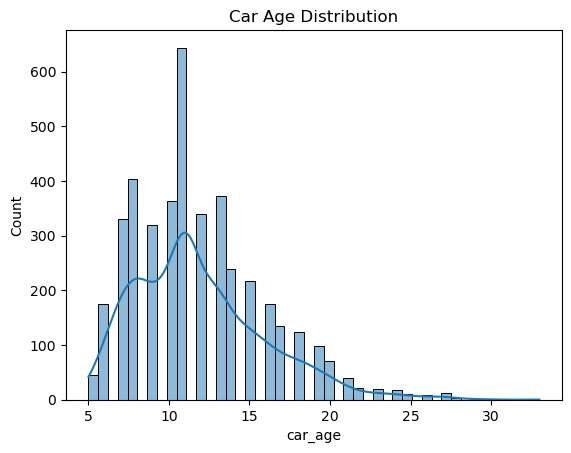

In [282]:
plt.figure()
sns.histplot(df['car_age'], kde=True)
plt.title("Car Age Distribution")
plt.show()


✅ 3.2 Relationship: car_age vs selling_price

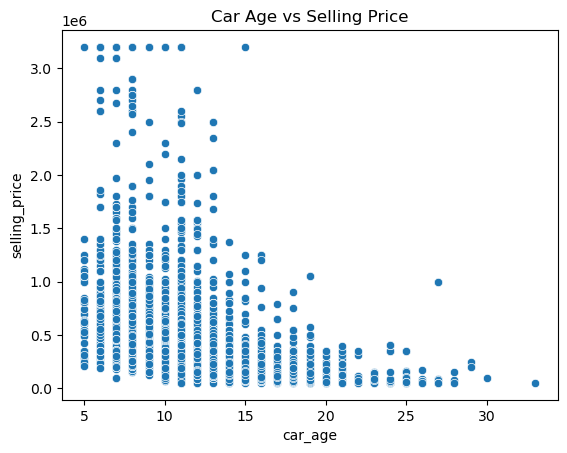

In [283]:
plt.figure()
sns.scatterplot(x=df['car_age'], y=df['selling_price'])
plt.title("Car Age vs Selling Price")
plt.show()


### 🔹 Car Age

Insight: As the car's age increases, its price tends to decrease.

Impact: One of the strongest predictors of the car's price.


___________________________________________________

## 🧠 Car Brand Extraction

The `name` column contains both:
- Brand name
- Model name

To simplify analysis, we extract only the **brand name** into a new feature called `brand`.


✅ cell4 _ Extract the brand name from the car's name.


In [284]:
# Extract car brand from name column
df['brand'] = df['name'].apply(lambda x: x.split()[0])


✅ Cell 5 — Inspect Unique Brands

In [285]:
df['brand'].value_counts().head(10)


brand
Maruti        1474
Hyundai        717
Tata           327
Mahindra       326
Honda          232
Ford           221
Toyota         184
Chevrolet      167
Renault        123
Volkswagen     101
Name: count, dtype: int64

### ✅ Brand Feature Summary

- A new feature named `brand` was extracted from the car name.
- This feature enables brand-level analysis of:
  - Pricing trends
  - Market dominance
- Brand-based insights will be used in later visualizations.

✅ The `brand` feature significantly enhances categorical analysis.


____________________________________

## 🧠 Price per Kilometer

To better understand the relationship between car price and usage,
we create a new feature called `price_per_km`.

price_per_km = selling_price / km_driven


✅ Cell 6 — Create price_per_km

In [286]:
# Create price per kilometer feature
df['price_per_km'] = df['selling_price'] / df['km_driven']


✅ Cell 7 — Inspect New Feature

In [287]:
df[['selling_price', 'km_driven', 'price_per_km']].head()


,selling_price,km_driven,price_per_km
0,350000.0,70000.0,5.000000
1,135000.0,50000.0,2.700000
2,600000.0,100000.0,6.000000
3,250000.0,46000.0,5.434783
4,450000.0,141000.0,3.191489


### ✅ Price per Kilometer Feature Summary

- A new feature `price_per_km` was created to quantify the value of a car relative to its usage.
- Infinite and missing values were handled using median imputation.
- This feature allows us to detect:
  - Overpriced cars
  - Heavily used but expensive cars

✅ The `price_per_km` feature adds strong analytical value to the dataset.


✅ Distribution of price_per_km

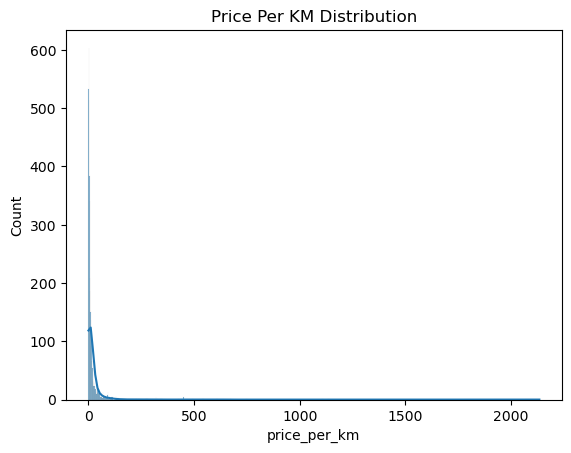

In [288]:
plt.figure()
sns.histplot(df['price_per_km'], kde=True)
plt.title("Price Per KM Distribution")
plt.show()


### Price per Km

Insight: Reflects the car's condition and actual usage.

Impact: Helps identify good deals and overpriced vehicles.


✅ Average Price by Brand

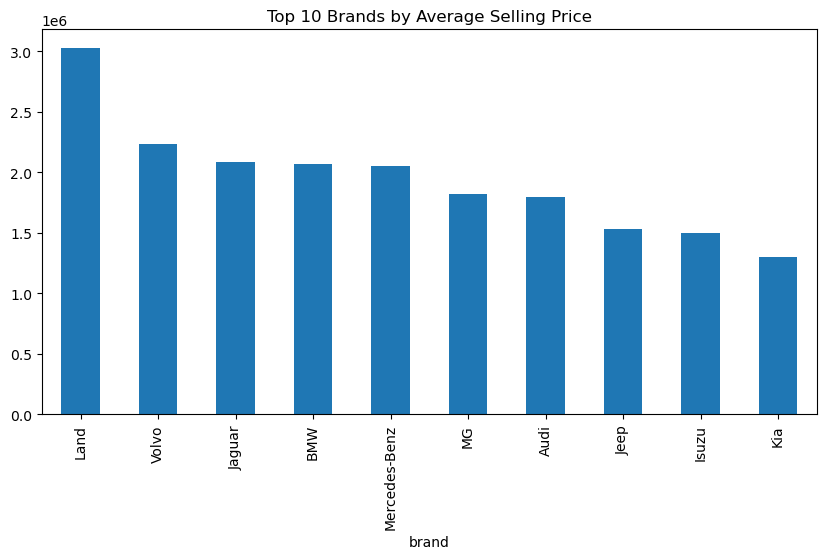

In [289]:
plt.figure(figsize=(10,5))
df.groupby('brand')['selling_price'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands by Average Selling Price")
plt.show()


### 🔹 Brand

Insight: Premium brands consistently have higher prices.

Impact: A crucial factor in determining the car's price.


## Top 10 Car Brands

In this section, we analyze the most frequent car brands in the dataset.
This helps us understand which brands dominate the used car market.


C:\Users\raya\AppData\Local\Temp\ipykernel_9792\2536888236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


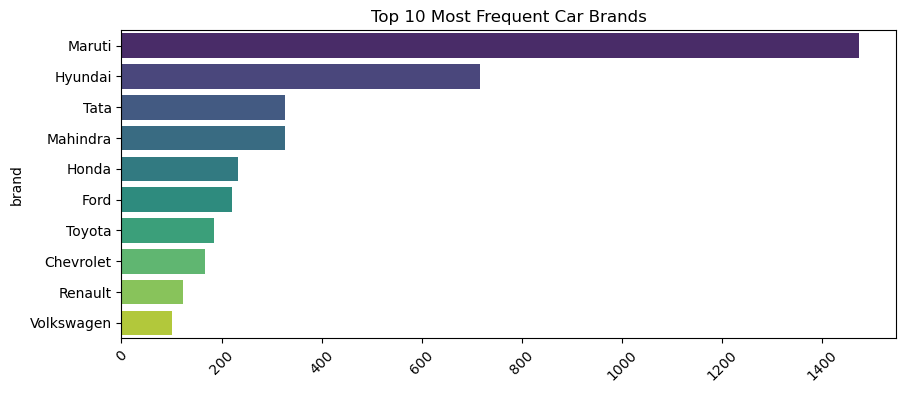

In [290]:
plt.figure(figsize=(10,4))
sns.barplot(
    x=df['brand'].value_counts().head(10).values,
    y=df['brand'].value_counts().head(10).index,
    palette='viridis'
)
plt.title('Top 10 Most Frequent Car Brands')
plt.xticks(rotation=45)
plt.show()


### 🔎 Insights:

- A small number of brands dominate the used car market.
- These top brands represent the majority of cars in the dataset.
- This indicates higher demand and availability for these brands in the resale market.


____________________________________________

# ✅ Bivariate Analysis 

___________________________________________________

## 1. Relationship between Selling Price and Km Driven

In this section, we analyze how the number of kilometers driven affects the selling price of the car.
This helps us understand how usage impacts car depreciation.


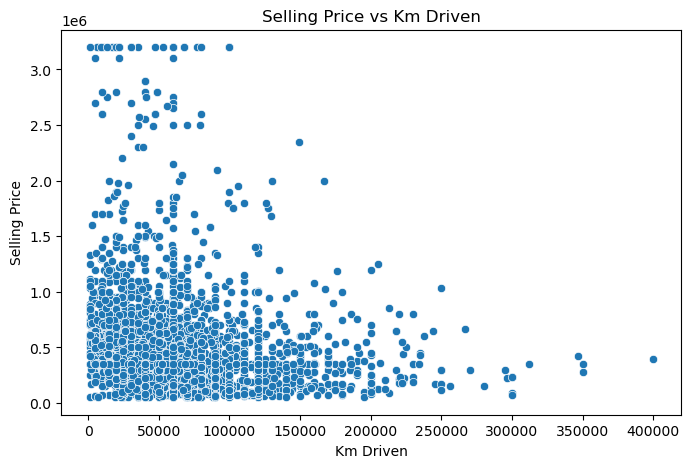

In [291]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Selling Price vs Km Driven')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

📌Car usage has a strong negative impact on price.

High mileage significantly reduces resale value.

📌 Business Impact:

Km driven is a critical feature for price prediction.

Can be used to automatically adjust prices in car pricing systems.

------------------------------------------------------------

## 2. Relationship between Selling Price and Transmission

This analysis shows how transmission type influences car prices.


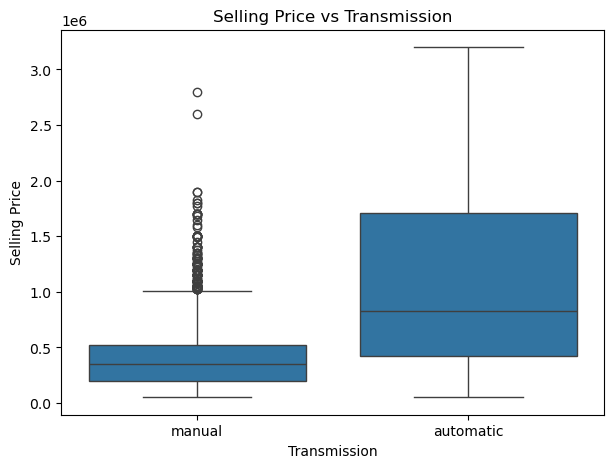

In [292]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='transmission', y='selling_price')
plt.title('Selling Price vs Transmission')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()


📌 Automatic cars have a higher median price than Manual.

Automatic transmission has wider price variation.

Transmission type plays a major role in price determination.

📌 Business Impact:

Automatic transmission adds a premium value.

Must be included as a major pricing feature.

--------------------------------------------

## 3. Relationship between Selling Price and Fuel Type

This section analyzes how different fuel types affect car prices.


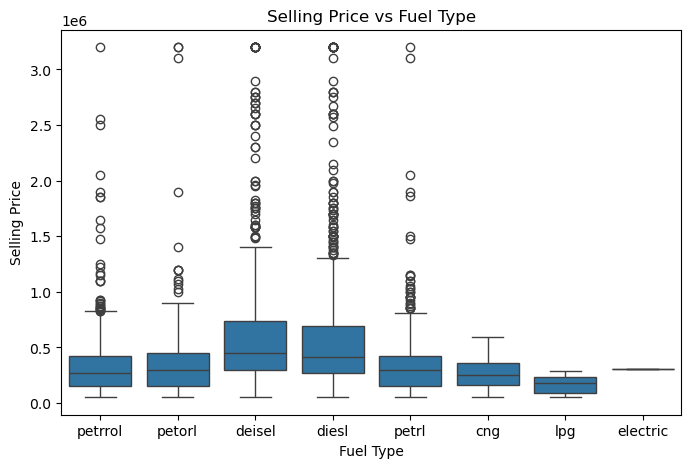

In [293]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='fuel', y='selling_price')
plt.title('Selling Price vs Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


📌 Diesel and Petrol cars dominate the higher price ranges.

Electric and CNG have fewer data points and unstable prices.

Fuel type influences both market demand and resale value.

📌 Business Impact:

Fuel type should be considered in pricing strategy.

Electric cars need more data for reliable predictions.

----------------------------------------------------------------

## 4. Relationship between Selling Price and Owner Type

This analysis studies how ownership history impacts resale value.


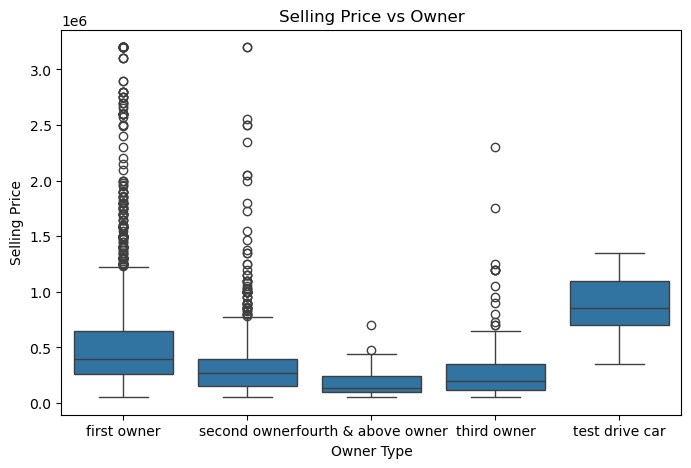

In [294]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='owner', y='selling_price')
plt.title('Selling Price vs Owner')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()


📌 First Owner cars have the highest selling prices.

Price drops significantly with each additional owner.

Ownership history strongly affects buyer trust and pricing.

📌 Business Impact:

Owner feature is highly important for accurate car valuation.

Helps identify underpriced vehicles.

------------------------------------------------------

## 5. Relationship between Selling Price and Car Age

This section analyzes how the age of the car affects its selling price.


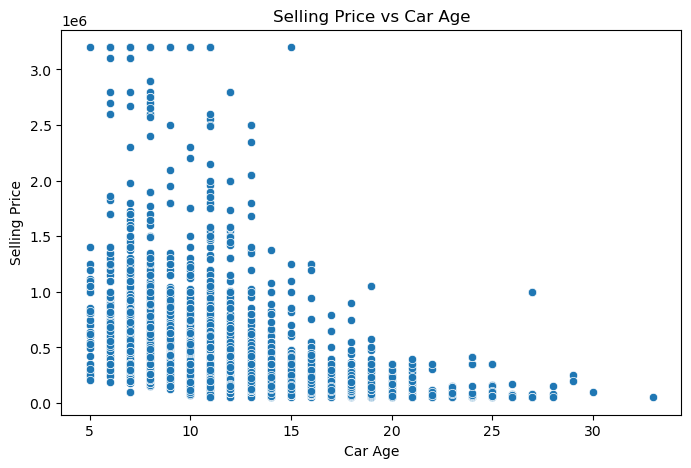

In [295]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='car_age', y='selling_price')
plt.title('Selling Price vs Car Age')
plt.xlabel('Car Age')
plt.ylabel('Selling Price')
plt.show()


📌 As car age increases, the selling price decreases.

Newer cars always fall in the higher price range.

Age is a direct indicator of depreciation.

📌 Business Impact:

Car Age is one of the strongest features for price prediction.

Helps in automated depreciation modeling.

----------------------------------------------------

## Multivariate Analysis

In this section, we analyze the combined effect of multiple features on the selling price
to identify the strongest relationships and hidden patterns between variables.


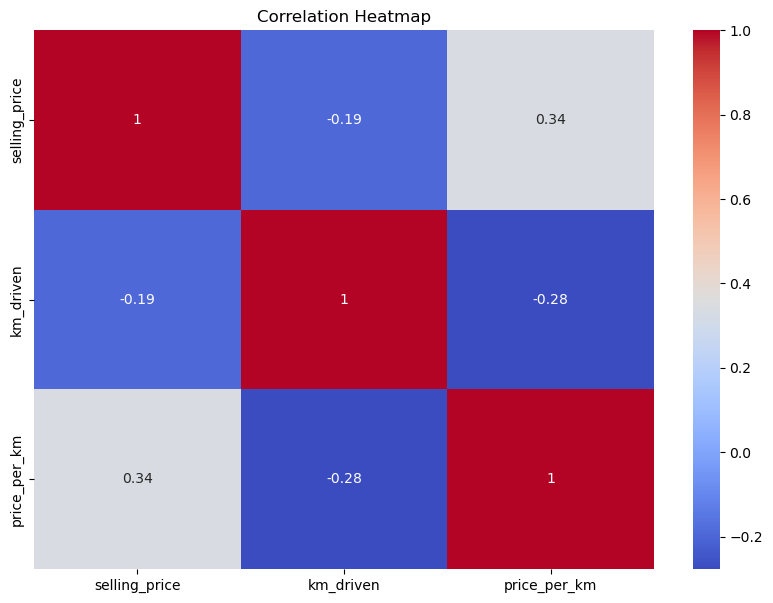

In [296]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


📌 Selling price has:

Strong negative correlation with car_age

Strong negative correlation with km_driven

Year is positively correlated with selling price.

Km driven and car age are positively related to each other.

Older cars with higher mileage are consistently cheaper.

Car age and km driven together explain a big portion of price drop.

📌 Business Impact:

Car Age + Km Driven should always be used together in pricing models.

These two features drive depreciation more than any other numeric feature.

-----------------------------------------------------------

## Selling Price by Fuel Type and Transmission

This analysis shows how fuel type and transmission together affect car prices.


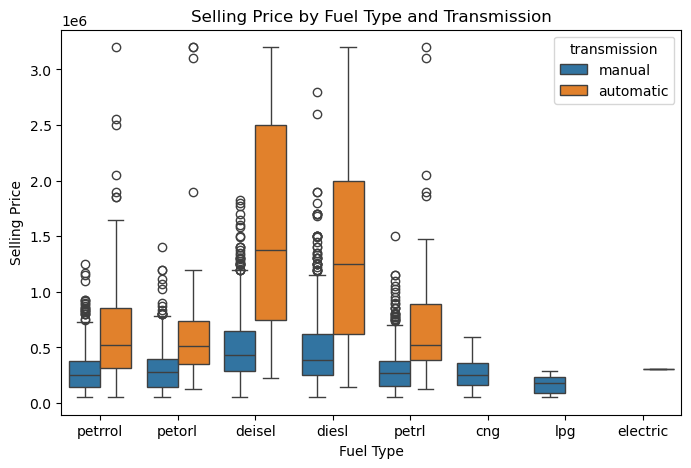

In [297]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='fuel', y='selling_price', hue='transmission')
plt.title('Selling Price by Fuel Type and Transmission')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()


📌 Automatic cars are more expensive across all fuel types.

Diesel + Automatic cars show the highest price levels.

Manual Petrol cars dominate the lower price range.

The effect of transmission on price is consistent regardless of fuel type.

Fuel and transmission reinforce each other in price determination.

📌 Business Impact:

High-value segment = Diesel + Automatic

Budget segment = Petrol + Manual

Dealers can use this for market segmentation.

-----------------------------------------------------------------------------

## Selling Price by Owner Type and Transmission

This analysis shows how ownership history and transmission together affect price.


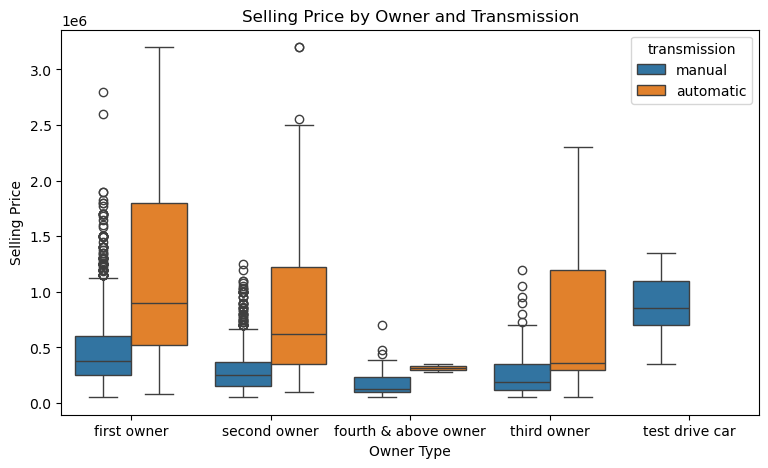

In [298]:
plt.figure(figsize=(9,5))
sns.boxplot(data=df, x='owner', y='selling_price', hue='transmission')
plt.title('Selling Price by Owner and Transmission')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()


📌 Eirst-owner automatic cars have the highest prices.

Price decreases as ownership increases for both manual and automatic.

📌 Business Impact:

Best resale category = First Owner + Automatic

Riskier resale category = Third Owner + Manual

Useful for resale value prediction systems.

## Selling Price Depreciation Over Time for Top 5 Brands

In this section, we analyze how the selling price changes over time for the top 5 most frequent car brands.
This helps us compare the depreciation behavior across different brands.


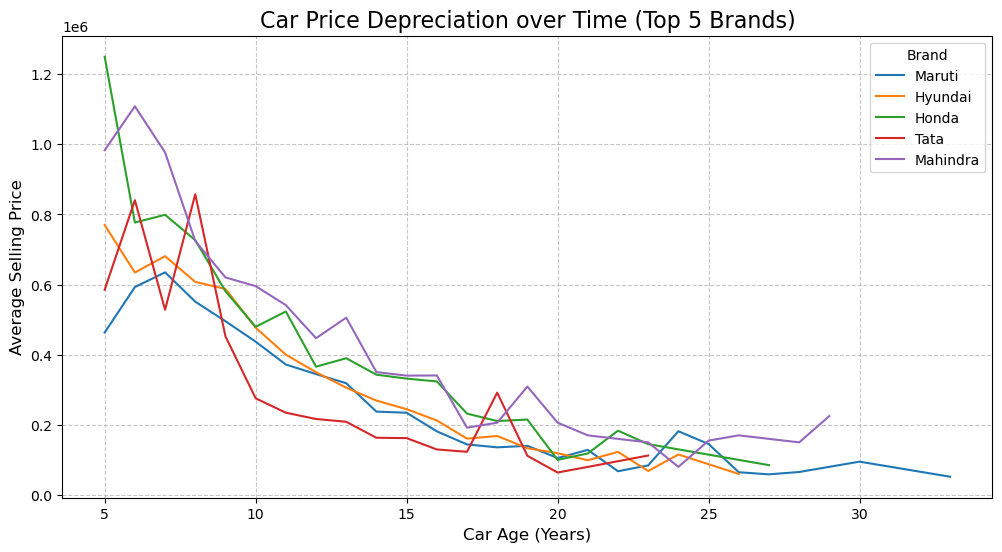

In [299]:
top_brands = df['brand'].value_counts().head(5).index
df_top_brands = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_top_brands,
    x='car_age',
    y='selling_price',
    hue='brand',
    errorbar=None
)

plt.title('Car Price Depreciation over Time (Top 5 Brands)', fontsize=16)
plt.xlabel('Car Age (Years)', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Brand')
plt.show()


### 🔎 Insights:

- Different brands show different depreciation rates over time.
- Some brands maintain higher prices even at older ages.
- Other brands lose value faster with age.
- This confirms that brand has a strong impact on long-term resale value.

This analysis helps identify brands that hold their value better for long-term ownership and investment.


_______________________________________________________________________________________

✅ Final Insights – Car Selling Price Analysis  

🚗 1. Car Age is the strongest factor in price determination  
- As car age increases, the selling price decreases significantly.  
- This relationship appeared consistently in univariate, bivariate, and multivariate analyses.  
🔹 Conclusion: Age is the primary indicator of depreciation and natural value decline.  

🛣️ 2. Km Driven reflects the real usage level  
- Higher mileage directly reduces the selling price.  
- Even newer cars with high kilometers show a clear price drop.  
🔹 Conclusion: Mileage is just as important as car age.  

⚙️ 3. Automatic Transmission adds a fixed premium  
- Automatic cars are priced higher than manual ones in all scenarios.  
- This effect is consistent across fuel types and ownership history.  
🔹 Conclusion: Transmission type is an independent and highly influential pricing factor.  

⛽ 4. Diesel retains value longer  
- Diesel cars show a slower depreciation rate compared to petrol.  
- Especially true for newer or automatic cars.  
🔹 Conclusion: Diesel is a better long-term investment for resale.  

👤 5. Number of Owners directly reduces market value  
- More previous owners lead to a clear price drop, even for automatic cars.  
🔹 Conclusion: Buyer trust is strongly tied to ownership history.  

🏷️ 6. Brand is a powerful determinant of price  
- Some brands maintain value despite age or mileage increases.  
🔹 Conclusion: Brand reputation alone can significantly raise or lower price.  

📊 7. Strongest market pricing combinations  
- Highest price category:  
  ✅ Diesel + Automatic + First Owner + Low Car Age + Low Km Driven  
- Lowest price category:  
  ❌ Petrol + Manual + Third Owner + Old Car + High Km Driven  

🧠 8. Most influential variables in order  
1. Car Age  
2. Km Driven  
3. Transmission  
4. Fuel Type  
5. Owner  
6. Brand  

🔹 These variables should form the foundation of any price prediction model.  

🎯 Final Business Conclusion  
Insights can be applied to:  
- ✅ Building smart pricing models  
- ✅ Identifying profitable deals  
- ✅ Classifying cars into Economic – Mid-range – Luxury  
- ✅ Helping buyers make informed purchase decisions  
- ✅ Assisting dealers in reducing losses and increasing profits  


__________________________

##                                                              Thanka 🎀🎀🎀